In [155]:
#Date: 27 Sept 2020, Author: Suman Prakash

#imports
import requests
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import numpy as np


#Basic Information to connect with Open Weather Map, OneCall Api, 
#Documentation for the same is available at https://openweathermap.org/api/one-call-api


api_key='d7532a988453f750f07f5d0a26b9fb4c'
api_base_url='https://api.openweathermap.org/data/2.5'
endpoint_path='/onecall'
city_latitude=25.6
city_longitude=85.12
units='metric'
exclude='minutely,hourly'
concat='&'
url=f"{api_base_url}{endpoint_path}?lat={city_latitude}{concat}lon={city_longitude}{concat}exclude={exclude}{concat}appid={api_key}{concat}units={units}"


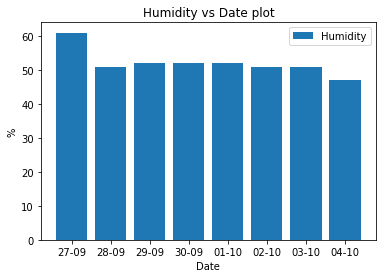

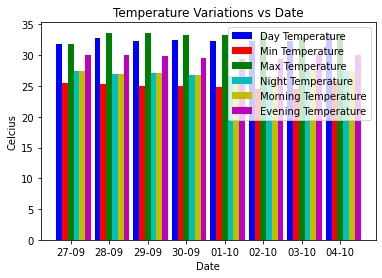

In [160]:
#Requesting API for weather data to extract desired information 
data_from_api = requests.get(url)

#checking a valid response from API and converting fetched data into json format to operate as on dictionaries
if data_from_api.status_code in range (200,299):    
    data=data_from_api.json()
    
#creating a dataframe from the data set response from API for weather report and predictions on daily basis
# and adding them to an excel sheet for reference   
output= "weather.csv"
df=pd.DataFrame(data['daily'])
#print(df.head)
df.to_csv(output, index=False)
data['daily']

#Using date fields in the frame to make a fresh list of dates in 'dd-mm-yy' format
_dates=[]
for values in df['dt']:
    _date = datetime.datetime.fromtimestamp(values).strftime('%d-%m')
    _dates.append(_date)

#processing desired data from dataframe that includes different variations of temperature and humidity on daily basis
humidity= df['humidity']
day_temperature= [temp['day'] for temp in df['temp']]
min_temperature= [temp['min'] for temp in df['temp']]
max_temperature= [temp['max'] for temp in df['temp']]
night_temperature= [temp['night'] for temp in df['temp']]
evening_temperature= [temp['eve']for temp in df['temp']]
morning_temperature= [temp['morn']for temp in df['temp']]

#Plotting a bar graph for Humidity prediction over coming dates with the use of matplotlib library 
plt.bar(_dates,humidity,label='Humidity')
plt.title("Humidity vs Date plot")
plt.xlabel("Date")
plt.ylabel("%")
plt.legend()
plt.show()


#Plotting a bar graph for different variants of temperature vs dates with the use of numpy and matplotlib library 

index=np.arange(8)
bar_width=0.15
Fig, ax= plt.subplots()
bar_daytemp=ax.bar(index-0.3, day_temperature, bar_width, Label="Day Temperature",color='b')
bar_mintemp=ax.bar(index-0.15, min_temperature, bar_width, Label="Min Temperature",color='r')
bar_maxtemp=ax.bar(index, max_temperature, bar_width, Label="Max Temperature",color='g')
bar_nighttemp=ax.bar(index+0.15, night_temperature, bar_width, Label="Night Temperature",color='c')
bar_morningtemp=ax.bar(index+0.3, night_temperature, bar_width, Label="Morning Temperature",color='y')
bar_eveningtemp=ax.bar(index+0.45, evening_temperature, bar_width, Label="Evening Temperature",color='m')

ax.set_xticks(index)
ax.set_xticklabels(_dates)
ax.set_xlabel("Date")
ax.set_ylabel("Celcius")
ax.set_title("Temperature Variations vs Date")
ax.legend([bar_daytemp,bar_mintemp,bar_maxtemp,bar_nighttemp,bar_morningtemp,bar_eveningtemp],
          ['Day Temperature','Min Temperature','Max Temperature','Night Temperature','Morning Temperature','Evening Temperature'])
plt.show()
